# Training Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

## Polynomial regression

In [2]:
np.random.seed(42)

m = 100 # number of observations
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

#### Figure 4.13

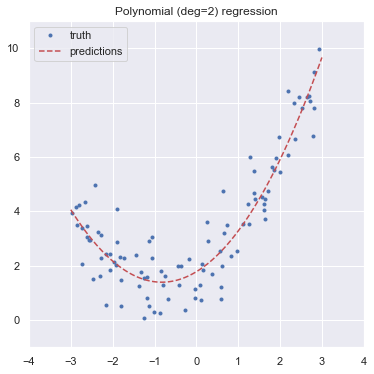

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly2.fit_transform(X)
lm = LinearRegression()
lm.fit(X_poly2, y)
X_test = np.linspace(-3, 3, 100)
X_test_poly2 = poly2.transform(X_test.reshape(-1, 1))
y_pred = lm.predict(X_test_poly2)

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(X.flatten(), y, 'b.', label='truth')
ax.plot(X_test, y_pred, 'r--', label='predictions')
ax.set_title('Polynomial (deg=2) regression')
ax.set_xlim([-4,4])
ax.set_ylim([-1,11])
ax.legend();

### Learning curves

#### Figure 4.14

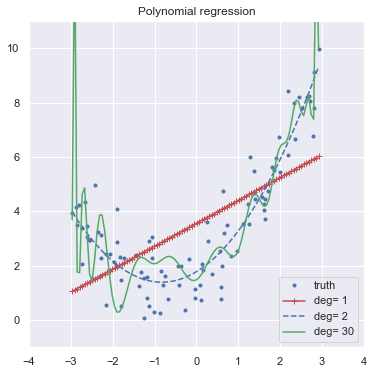

In [4]:
degrees = [1, 2, 30]
formats = ['r-+', 'b--', 'g-']

def poly_regr(X, y, degrees):
    for i, d in enumerate(degrees):
        poly = PolynomialFeatures(degree=d, include_bias=False)
        X_poly = poly.fit_transform(X)
        lm = LinearRegression()
        lm.fit(X_poly, y)
        X_test = np.linspace(X.flatten().min(),X.flatten().max(),  100)
        X_test_poly = poly.transform(X_test.reshape(-1, 1))
        y_pred = lm.predict(X_test_poly)
        ax.plot(X_test, y_pred, formats[i], label='deg= ' + str(d))

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(X.flatten(), y, 'b.', label='truth')
poly_regr(X, y, degrees)
ax.set_title('Polynomial regression')
ax.set_xlim([-4,4])
ax.set_ylim([-1,11])
ax.legend();

#### Figure 4.15

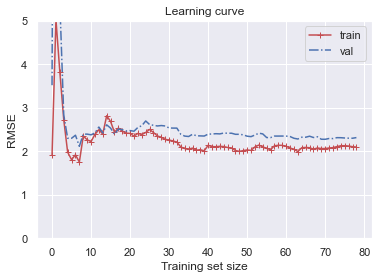

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    """Plots learning curves by using different sized subsets of the training set."""
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_rmse, valid_rmse = [], []
    for i in range(1, len(X_train[:, 0])):
        model.fit(X_train[:i], y[:i]) # choose first i observations
        y_train_pred = model.predict(X_train[:i])
        y_val_pred = model.predict(X_val)
        train_rmse.append(np.sqrt(mean_squared_error(y_train[:i], y_train_pred)))
        valid_rmse.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
    plt.figure()
    plt.plot(train_rmse, 'r-+', label='train')
    plt.plot(valid_rmse, 'b-.', label='val')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.title('Learning curve')
    plt.ylim([0, 5])
    plt.legend();

plot_learning_curves(LinearRegression(), X, y)

#### Figure 4.16

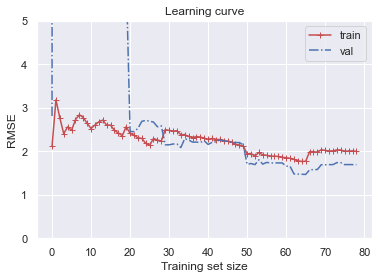

In [6]:
from sklearn.pipeline import Pipeline
poly_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])
plot_learning_curves(poly_reg, X, y)

In [7]:
np.random.seed(42)
n = 100 # 100 samples
x = np.random.rand(n, 1)
y = 4 + 3 * x + np.random.randn(n, 1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x, y)
lr.intercept_, lr.coef_

(array([4.21509616]), array([[2.54022677]]))

(200, 200)


<a list of 7 text.Text objects>

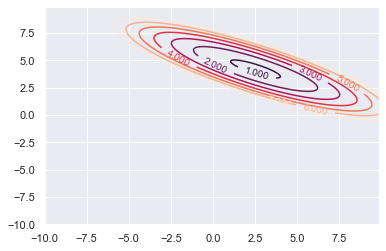

In [8]:
# contour plot of mse as a function of the beta parameters
x1 = np.arange(-10, 10, 0.1)
x2 = np.arange(-10, 10, 0.1)
xx, yy = np.meshgrid(x1, x2)
z = np.zeros_like(xx)

x_b = np.c_[np.ones_like(x), x]
for j, beta1 in enumerate(x2):
    for i, beta0 in enumerate(x1):
        betas = np.array([beta0, beta1]).reshape(2, 1)
        z[i, j] = np.mean(np.square(y - x_b.dot(betas)))
print(z.shape)
plt.figure()
cs = plt.contour(xx, yy, z, levels=np.arange(8))
plt.clabel(cs, inline=True)

## Batch Gradient Descent

In [9]:
eta = 0.1 # learning rate
n = 100
n_iter = 1000
theta = np.random.rand(2, 1)
for i in range(n_iter):
    gradients = 2 * x_b.T.dot(x_b.dot(theta) - y) / n
    theta = theta - eta * gradients
theta

array([[4.21509624],
       [2.54022662]])

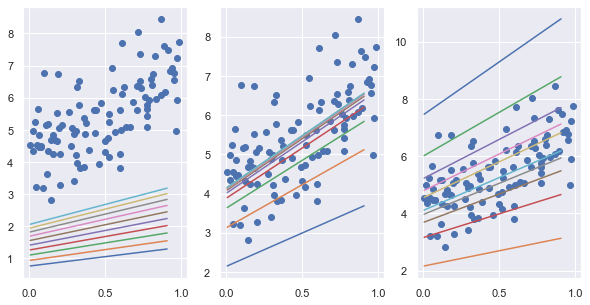

In [10]:
etas = [.02, .2, .7]
x_new = np.arange(np.min(x), np.max(x), 0.1)
x_new_b = np.c_[np.ones_like(x_new), x_new]
fig = plt.figure(figsize=(10, 5))
for i, eta in enumerate(etas):
    ax = plt.subplot(1, 3, i+1)
    ax.scatter(x, y)
    theta = np.random.rand(2, 1)
    for j in range(10):
        gradients = 2 * x_b.T.dot(x_b.dot(theta) - y) / n
        theta = theta - eta * gradients
        y_new = x_new_b.dot(theta)
        ax.plot(x_new, y_new)

## Stochastic Gradient Descent

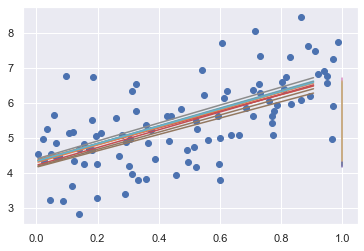

In [11]:
n_epochs = 50
learning_schedule = lambda t: 5 / (t + 50)
theta = np.random.rand(2, 1)
f, ax = plt.subplots()
ax.scatter(x, y)
for e in range(n_epochs):
    for i in range(n):
        idx = np.random.randint(n)
        xi = x_b[idx: idx+1]
        yi = y[idx: idx+1]
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(e * n + i)
        theta = theta - eta * gradient
    if e < 10:
        ax.plot(x_new_b, x_new_b.dot(theta))

In [12]:
theta

array([[4.18383929],
       [2.49757684]])

## Logistic Regression

In [13]:
from sklearn import datasets
iris = datasets.load_iris()

In [14]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [15]:
X = iris.data[:, 3].reshape(-1, 1) # use only petal width
y = (iris.target == 2)*1 # Virginica class

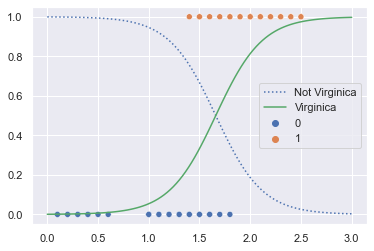

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X, y)
X_new = np.linspace(0, 3, 100).reshape(-1, 1)
probs = lr.predict_proba(X_new)
ax = sns.scatterplot(x=X.flatten(), y=y, hue=y, y_jitter=True)
ax.plot(X_new, probs[:, 0], 'b:', label='Not Virginica')
ax.plot(X_new, probs[:, 1], 'g-', label='Virginica')
ax.legend()
plt.show()

<a list of 8 text.Text objects>

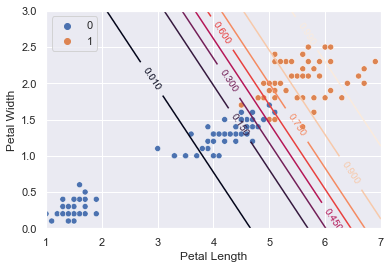

In [17]:
X = iris.data[:, 2:] # use petal length and width
y = (iris.target == 2)*1 # Virginica class
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
lr = LogisticRegression().fit(X, y)
x1 = np.linspace(1, 7, 100)
x2 = np.linspace(0, 3, 100)
xx, yy = np.meshgrid(x1, x2)
X_new = np.c_[xx.flatten(), yy.flatten()]
z = lr.predict_proba(X_new)[:, 1].reshape(xx.shape)
cs = ax.contour(xx, yy, z, levels=np.array([.01, .15, .30, .45, .60, .75, .90, .99]))
ax.clabel(cs, inline=True)

## Softmax Regression
It is like Logistic Regression for multi-class situation. 

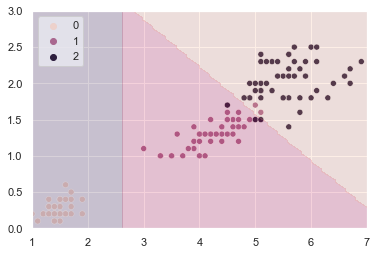

In [81]:
X = iris.data[:, 2:] # use petal length and width
y = iris.target
softmax_reg = LogisticRegression(multi_class='multinomial', 
                             C=10, # the decision boundaries are greatly influenced by C
                             solver='lbfgs', random_state=42).fit(X, y)
z = softmax_reg.predict(X_new).reshape(xx.shape)
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
cs = ax.contourf(xx, yy, z, levels=2, alpha=0.2)

# Excercise

## 2
- OLS doesn't suffer from this, as the coefficients are adjusted accordingly such that (coeff * feature) is constant.
- Ridge and Lasso suffer from the features not being on same scale. 
- Standardization helps!

## 3
Gradient descent can't get stuck in local minima for logistic regression as the cost/loss function is convex. 

## 4
Probably not! It depends on the shape of the cost function, learning schedule. Some algorithms can get stuck in local minima. Yet some others like SGD don't converge and keep bouncing around the minima. 

## 5
It might mean 2 things:
1. The model could be overfitting to the traninig data.
2. The model might be coming out of a local minima.

## 6
It is not a good idea to stop mini-batch GD as soon as the validation error starts going up as it could be coming out of a local minima.

## 8
A large gap b/w training and validation errors could indicate that the model is overfitting the training set. 3 ways to avoid this are:
1. reduce model complexity by reducing the degree of the polynimial.
2. try l1 or l2 regularization.
3. try to get more samples.

## 9
If the traning and validation errors are similar and high, the Ridge model might be too simplistic or over constrained/regularized. This indicates that the model is high-bias and probably not high-variance. We would want to reduce alpha.

## 11
softmax regression is multi-class but not multi-output i.e. it can't predict b/w indoors/outdoors & daytime/nighttime.
We should probably train 2 logistic regression models here. 

## 12
Doesn't work :(

In [82]:
X = iris.data[:, 2:] # use petal length and width
X_b = np.c_[np.ones_like(X[:, 0]), X] # bias
y = iris.target
X.shape, X_b.shape, y.shape

((150, 2), (150, 3), (150,))

In [83]:
n_classes = len(np.unique(y))
n_features = len(X_b[0])
n_classes, n_features

(3, 3)

In [84]:
theta = np.random.rand(n_classes, n_features) # random initialization
theta

array([[0.11006328, 0.92504718, 0.63164352],
       [0.05439075, 0.64425672, 0.97424765],
       [0.06980065, 0.55468771, 0.74779435]])

In [85]:
scores = X_b.dot(theta)
scores[:5,]

array([[0.20017046, 1.93794413, 2.1451491 ],
       [0.20017046, 1.93794413, 2.1451491 ],
       [0.19473139, 1.87351846, 2.04772434],
       [0.20560954, 2.0023698 , 2.24257387],
       [0.20017046, 1.93794413, 2.1451491 ]])

In [86]:
def softmax(scores):
    a = np.exp(scores)
    return a / np.sum(a, axis=1, keepdims=True)
probs = softmax(scores)
probs[:5,]

array([[0.07310927, 0.41560232, 0.5112884 ],
       [0.07310927, 0.41560232, 0.5112884 ],
       [0.07850566, 0.42071592, 0.50077841],
       [0.06803935, 0.41028269, 0.52167797],
       [0.07310927, 0.41560232, 0.5112884 ]])

In [87]:
# one-hot encode y
y_oh = np.zeros((y.size, n_features))
y_oh[np.arange(y.size), y] = 1
y_oh[[0, 70, 140], :]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [88]:
gradients = np.mean(probs - y_oh, axis=0)
gradients

array([-0.30862535, -0.08583027,  0.39445562])

In [89]:
eta = 0.1
theta - eta * gradients

array([[0.14092582, 0.9336302 , 0.59219795],
       [0.08525328, 0.65283975, 0.93480209],
       [0.10066319, 0.56327074, 0.70834879]])

In [100]:
n_iter = 1000
eta = 0.1 # learning rate
for iter in range(n_iter):
    scores = X_b.dot(theta)
    probs = softmax(scores)
    gradients = np.mean(probs - y_oh, axis=0)
    theta = theta - eta * gradients
theta

array([[0.58105897, 0.78841491, 0.2972801 ],
       [0.52538643, 0.50762446, 0.63988424],
       [0.54079634, 0.41805544, 0.41343093]])

In [91]:
softmax_reg.coef_

array([[-4.58614563, -2.24129385],
       [ 0.16068263, -2.15860167],
       [ 4.425463  ,  4.39989552]])

In [92]:
softmax_reg.predict_proba(X[0].reshape(1, -1))

array([[9.97066483e-01, 2.93351658e-03, 7.71381685e-14]])

In [105]:
softmax(X_b[[120]].dot(theta))

array([[0.34277897, 0.2874056 , 0.36981543]])